# **ANÁLISIS ITERATIVO DE LAS CATEGORÍAS DE ESCUELAS Y TRADICIONES FILOSÓFICAS EN WIKIPEDIA**
#### Anastasiia Lupandina, carné 22776

In [1]:
import wikipediaapi
import pickle
from pprint import pprint
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dcss.text import bigram_process, preprocess, bow_to_df
from dcss.plotting import format_axes_commas, custom_seaborn
from dcss.utils import sparse_groupby
custom_seaborn()
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import scipy
from itertools import islice

In [2]:
wiki_wiki = wikipediaapi.Wikipedia('Ciencias Sociales Computacionales (lup22776@uvg.edu.gt)', 'en')

In [3]:
#1. Busqueda de Analytic philosophy
cat_analytic_philosophy = wiki_wiki.page("Category:Analytic philosophy")
print("Analytic philosophy exist: %s" % cat_analytic_philosophy.exists())
#2. Busqueda de Aristotelianism
cat_aristotelianism = wiki_wiki.page("Category:Aristotelianism")
print("Aristotelianism exist: %s" % cat_aristotelianism.exists())
# 3. Busqueda de Humanism
cat_humanism = wiki_wiki.page("Category:Humanism")
print("Humanism exist: %s" % cat_humanism.exists())
# 4. Busqueda Islamic philosophy
cat_islamic_philosophy = wiki_wiki.page("Category:Islamic philosophy")
print("Islamic philosophy exist: %s" % cat_islamic_philosophy.exists())
# 5. Busqueda Kyoto School
cat_kyoto_school = wiki_wiki.page("Category:Kyoto School")
print("Kyoto School exist: %s" % cat_kyoto_school.exists())
# 6. Busqueda de Logical positivism
cat_logical_positivism = wiki_wiki.page("Category:Logical positivism")
print("Logical positivism exist: %s" % cat_logical_positivism.exists())
# 7. Busqueda de Philosophical pessimism
cat_philosophical_pessimism = wiki_wiki.page("Category:Philosophical pessimism")
print("Philosophical pessimism exist: %s" % cat_philosophical_pessimism.exists())
# 8. Busqueda de Platonism
cat_platonism = wiki_wiki.page("Category:Platonism")
print("Platonism exist: %s" % cat_platonism.exists())
# 9. Busqueda de Postmodernism
cat_postmodernism = wiki_wiki.page("Category:Postmodernism")
print("Postmodernism exist: %s" % cat_postmodernism.exists())
# 10. Busqueda de Rationalism
cat_rationalism = wiki_wiki.page("Category:Rationalism")
print("Rationalism exist: %s" % cat_rationalism.exists())
# 11. Busqueda de Skepticism
cat_skepticism = wiki_wiki.page("Category:Skepticism")
print("Skepticism exist: %s" % cat_skepticism.exists())
# 12. Busqueda de Nihilism
cat_nihilism = wiki_wiki.page("Category:Nihilism")
print("Nihilism exist: %s" % cat_nihilism.exists())


Analytic philosophy exist: True
Aristotelianism exist: True
Humanism exist: True
Islamic philosophy exist: True
Kyoto School exist: True
Logical positivism exist: True
Philosophical pessimism exist: True
Platonism exist: True
Postmodernism exist: True
Rationalism exist: True
Skepticism exist: True
Nihilism exist: True


In [4]:
data = []
pages_names = cat_analytic_philosophy.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_analytic_philosophy,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_aristotelianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_aristotelianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_humanism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_humanism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_islamic_philosophy.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_islamic_philosophy,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_kyoto_school.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_kyoto_school,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_logical_positivism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_logical_positivism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_philosophical_pessimism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_philosophical_pessimism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_platonism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_platonism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_postmodernism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_postmodernism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_rationalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_rationalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_skepticism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_skepticism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_nihilism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_nihilism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

df = pd.DataFrame(data)

In [5]:

df.to_csv('../data/EscuelasYTradicionesFilosóficas.csv')

In [6]:
columns = ['Category', 'Namespace', 'Title', 'Summary', 'Content']
wiki_df = pd.read_csv('../data/EscuelasYTradicionesFilosóficas.csv')
wiki_df.dropna(subset = ['Title', 'Summary'], inplace=True)
wiki_df =wiki_df.query('Namespace < 1')
wiki_df['Category'].value_counts()

Category:Postmodernism (id: 1028890, ns: 14)               121
Category:Humanism (id: 891562, ns: 14)                      86
Category:Skepticism (id: 5623842, ns: 14)                   70
Category:Analytic philosophy (id: 815949, ns: 14)           68
Category:Platonism (id: 747655, ns: 14)                     55
Category:Rationalism (id: 2664243, ns: 14)                  49
Category:Aristotelianism (id: 17854238, ns: 14)             44
Category:Nihilism (id: 2664005, ns: 14)                     21
Category:Islamic philosophy (id: 717100, ns: 14)            19
Category:Logical positivism (id: 12068714, ns: 14)          19
Category:Kyoto School (id: 39138656, ns: 14)                15
Category:Philosophical pessimism (id: 63806681, ns: 14)      8
Name: Category, dtype: int64

In [8]:
content_keep = [
    'Category:Postmodernism (id: 1028890, ns: 14)',
    'Category:Humanism (id: 891562, ns: 14)',
    'Category:Skepticism (id: 5623842, ns: 14)',
    'Category:Analytic philosophy (id: 815949, ns: 14)',
    'Category:Platonism (id: 747655, ns: 14)',
    'Category:Rationalism (id: 2664243, ns: 14)',
    'Category:Aristotelianism (id: 17854238, ns: 14)',
    'Category:Nihilism (id: 2664005, ns: 14)',
    'Category:Islamic philosophy (id: 717100, ns: 14)',
    'Category:Logical positivism (id: 12068714, ns: 14)',
    'Category:Kyoto School (id: 39138656, ns: 14)',
    'Category:Philosophical pessimism (id: 63806681, ns: 14)'
]
content_subset = wiki_df[wiki_df['Category'].isin(content_keep)].copy()
content_subset.reset_index(drop=True, inplace=True)
total_content_counts = content_subset['Category'].value_counts()
total_content_counts

Category:Postmodernism (id: 1028890, ns: 14)               121
Category:Humanism (id: 891562, ns: 14)                      86
Category:Skepticism (id: 5623842, ns: 14)                   70
Category:Analytic philosophy (id: 815949, ns: 14)           68
Category:Platonism (id: 747655, ns: 14)                     55
Category:Rationalism (id: 2664243, ns: 14)                  49
Category:Aristotelianism (id: 17854238, ns: 14)             44
Category:Nihilism (id: 2664005, ns: 14)                     21
Category:Islamic philosophy (id: 717100, ns: 14)            19
Category:Logical positivism (id: 12068714, ns: 14)          19
Category:Kyoto School (id: 39138656, ns: 14)                15
Category:Philosophical pessimism (id: 63806681, ns: 14)      8
Name: Category, dtype: int64

In [9]:
sampled_contents = content_subset.groupby('Category').sample(replace=False, frac=.5, random_state=23)
len(sampled_contents)

288

In [10]:
with open('../data/pickles/sampled_wiki_escuelas_y_tradiciones_filosóficas_content.pkl', 'wb') as fp:
    pickle.dump(sampled_contents, fp)
sampled_contents_counts = sampled_contents['Category'].value_counts()
sample_sizes = pd.DataFrame(zip(total_content_counts, sampled_contents_counts), columns=['Total', 'Sample'], index=content_keep)

In [11]:
sampled_contents['content_len'] = sampled_contents['Content'].apply(lambda x: len(x.split()))

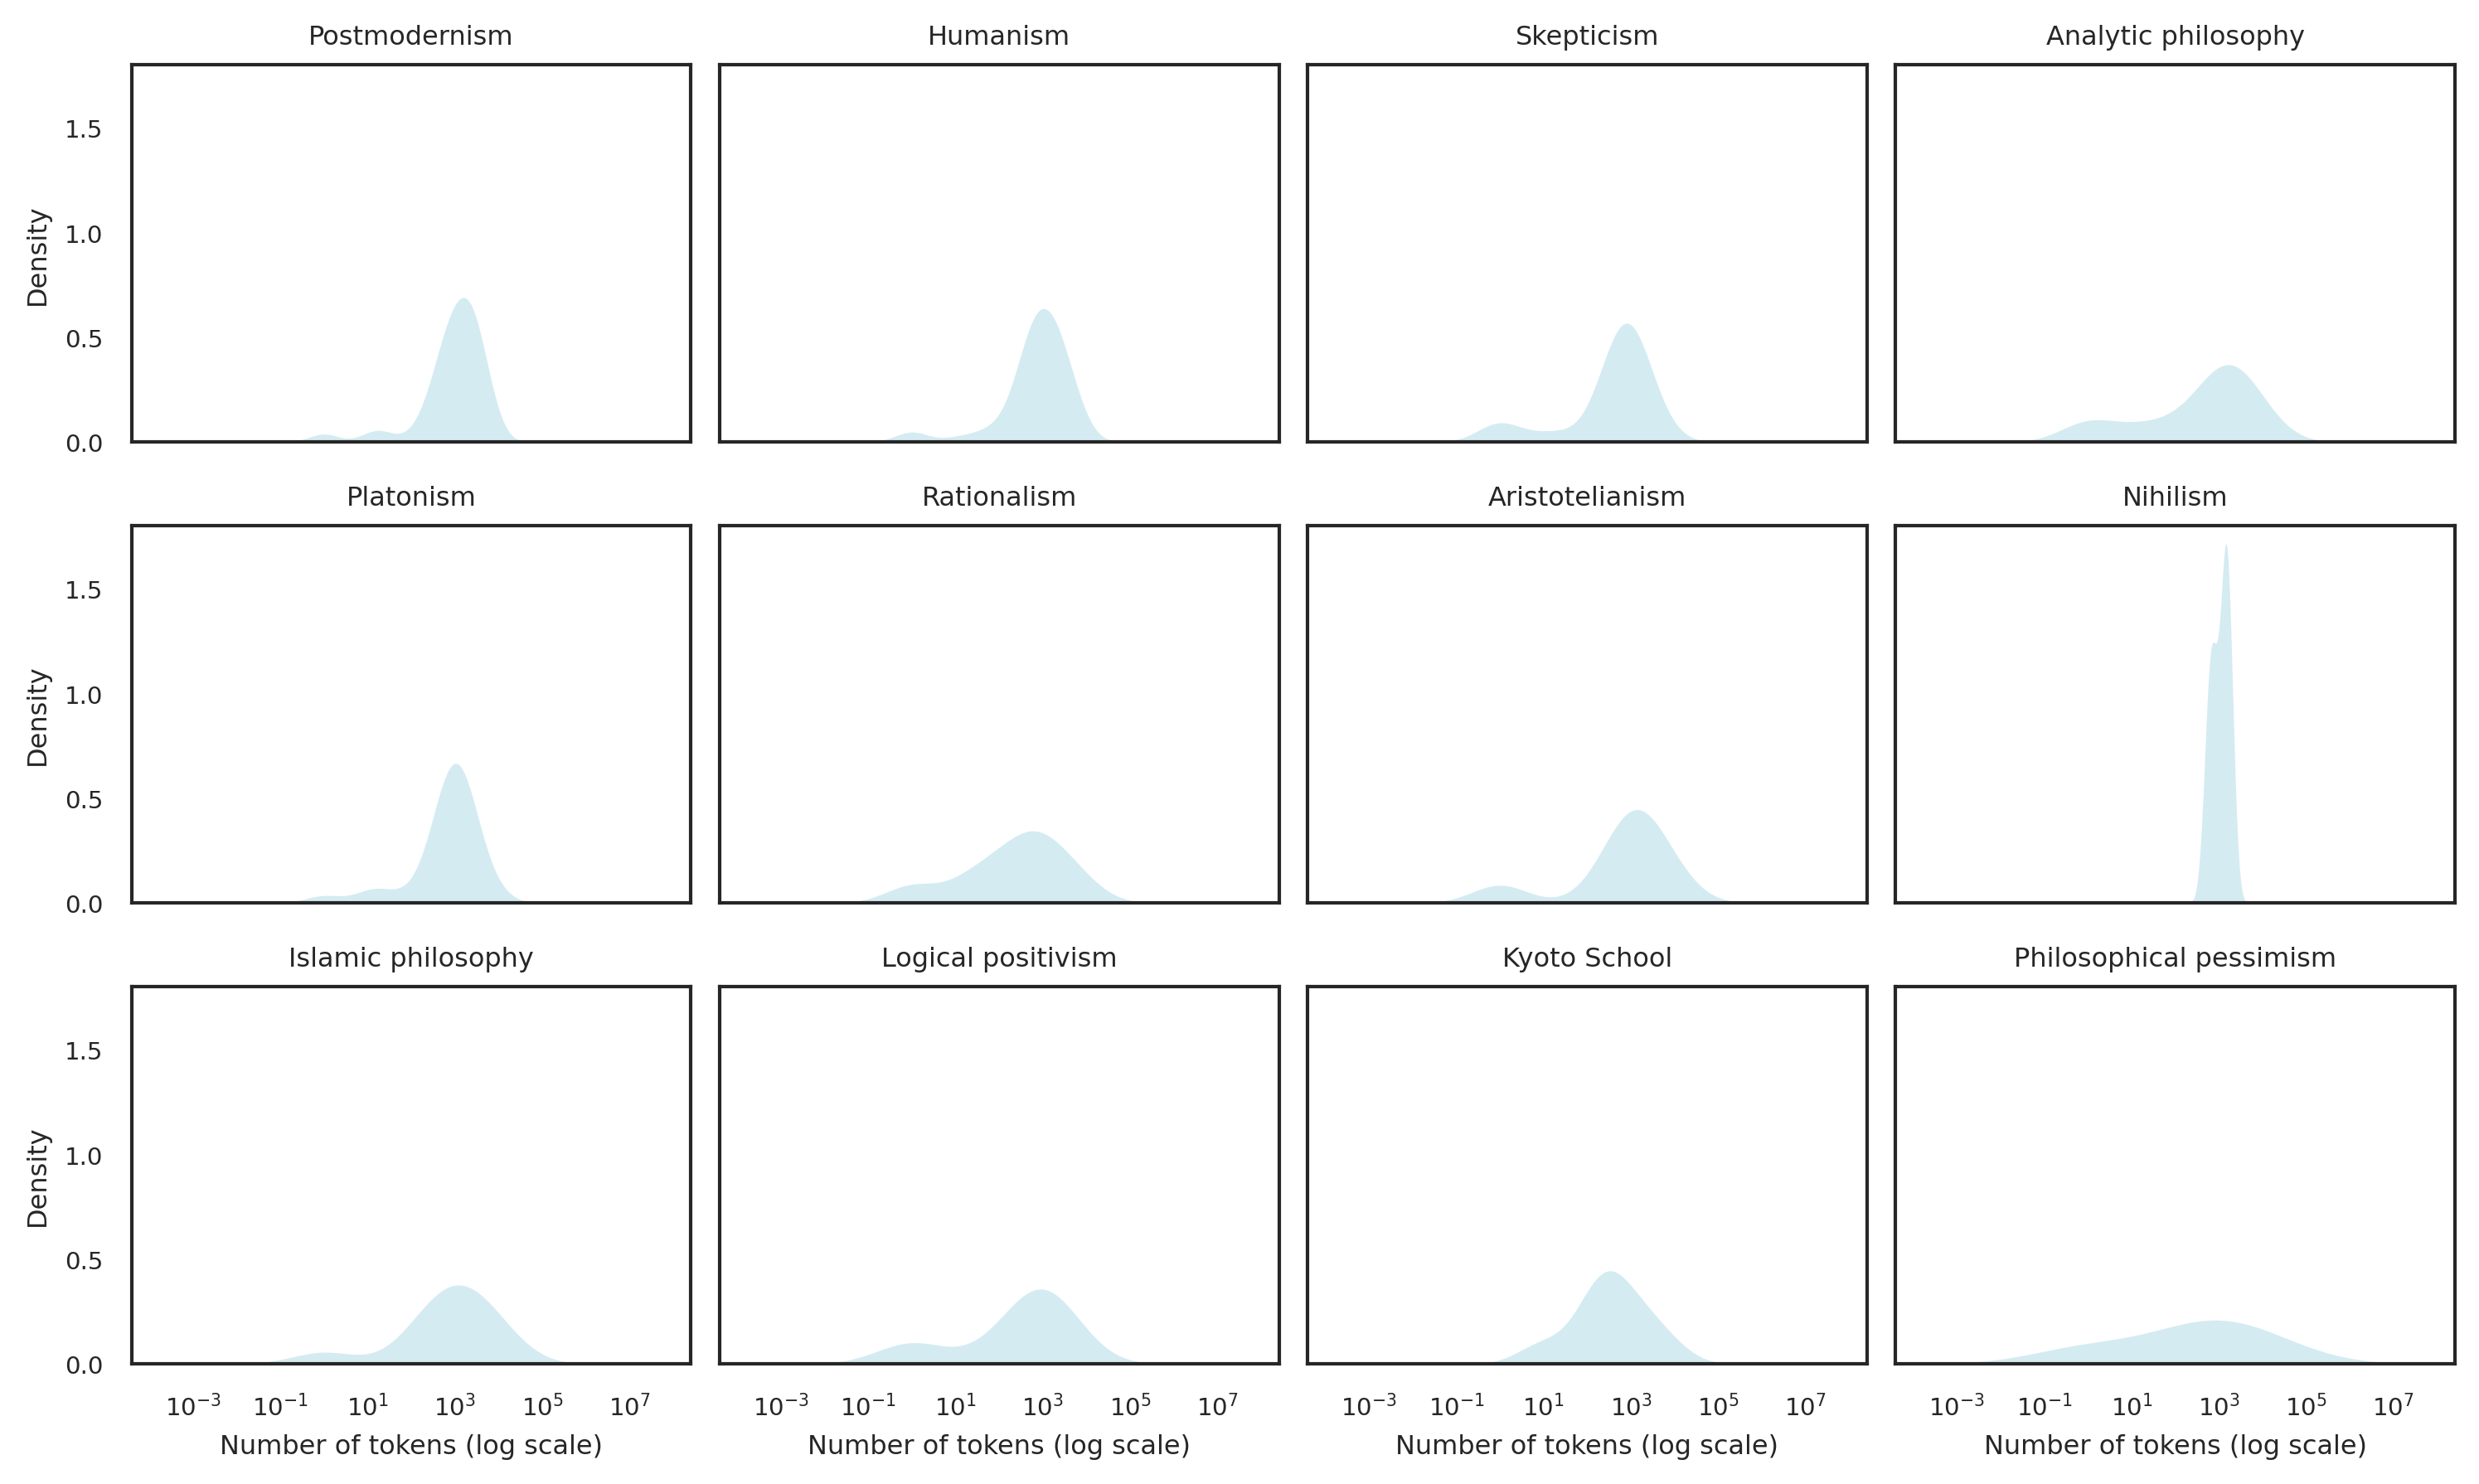

In [14]:
categories = sampled_contents.groupby('Category')
def categoria_subplot(subgroup, title, position):
    sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=.5, linewidth=0, color='lightblue') 
    position.set(xlabel='Number of tokens (log scale)', title=title)
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))

categoria_subplot(categories.get_group('Category:Postmodernism (id: 1028890, ns: 14)'), 'Postmodernism', ax[0,0])
categoria_subplot(categories.get_group('Category:Humanism (id: 891562, ns: 14)'), 'Humanism', ax[0,1])
categoria_subplot(categories.get_group('Category:Skepticism (id: 5623842, ns: 14)'), 'Skepticism', ax[0,2])
categoria_subplot(categories.get_group('Category:Analytic philosophy (id: 815949, ns: 14)'), 'Analytic philosophy', ax[0,3])
categoria_subplot(categories.get_group('Category:Platonism (id: 747655, ns: 14)'),'Platonism', ax[1,0])
categoria_subplot(categories.get_group('Category:Rationalism (id: 2664243, ns: 14)'), 'Rationalism', ax[1,1])
categoria_subplot(categories.get_group('Category:Aristotelianism (id: 17854238, ns: 14)'), 'Aristotelianism', ax[1,2])
categoria_subplot(categories.get_group('Category:Nihilism (id: 2664005, ns: 14)'), 'Nihilism', ax[1,3])
categoria_subplot(categories.get_group('Category:Islamic philosophy (id: 717100, ns: 14)'),'Islamic philosophy', ax[2,0])
categoria_subplot(categories.get_group('Category:Logical positivism (id: 12068714, ns: 14)'), 'Logical positivism', ax[2,1])
categoria_subplot(categories.get_group('Category:Kyoto School (id: 39138656, ns: 14)'), 'Kyoto School', ax[2,2])
categoria_subplot(categories.get_group('Category:Philosophical pessimism (id: 63806681, ns: 14)'), 'Philosophical pessimism', ax[2,3])

plt.tight_layout()
plt.show()
fig.savefig("graphphilosophyWiki")

In [15]:
bigram_model, preprocessed = preprocess(sampled_contents['Content'], nlp=nlp, bigrams= True, detokenize = True, n_process=4)

In [16]:
len(preprocessed)

288

In [17]:
with open('../data/pickles/sampled_wiki_escuelas_y_tradiciones_filosóficas_content.pkl', 'wb') as fp:
    pickle.dump(preprocessed, fp)

with open('../data/pickles/sampled_wiki_escuelas_y_tradiciones_filosóficas_content.pkl', 'wb') as fp:
    pickle.dump(bigram_model, fp)

with open('../data/pickles/sampled_wiki_escuelas_y_tradiciones_filosóficas_content.pkl', 'rb') as fp:
    preprocessed = pickle.load(fp)

In [18]:
sampled_contents.iloc[100]['Content']

'[Section: Freedom versus fatalism and the Kalam (1):\nA century after the Qur\'an was written, numerous religious schisms arose in Islam. Skeptics sought to investigate the doctrines of the Qur\'an, which until then had been accepted as divine revelation. The first independent protest was that of the Qadar ("Destiny"), whose partisans affirmed the freedom of the will, in contrast with the Jabarites (jabar, force, constraint), who maintained the traditional belief in fatalism.\nIn the second century of the Hijrah, a schism arose in the theological schools of Basra, over which Hasan al-Basri presided. A pupil, Wasil ibn Ata, who was expelled from the school because his answers were contrary to tradition, proclaimed himself leader of a new school, and systematized all the radical opinions of preceding sects, particularly those of the Kadarites. This new school or sect was called Mutazilites (from \'tazala, to separate oneself, to dissent).   The sect had three principal dogmas: (1) God i

In [19]:
sampled_contents['preprocessed'] = preprocessed

In [20]:
sampled_contents.iloc[100]['preprocessed']

In [21]:
count_vectorizer = CountVectorizer(max_df=.1, min_df=3, strip_accents='ascii',)

In [22]:
count_matrix = count_vectorizer.fit_transform(preprocessed)
vocabulary = count_vectorizer.get_feature_names_out()
count_matrix.shape

TypeError: 'int' object is not iterable

In [2]:
with open('../data/pickles/count_matrix.pkl', 'wb') as fp:
    pickle.dump(count_matrix, fp)

with open('../data/pickles/vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)

NameError: name 'pickle' is not defined

In [3]:
count_data = pd.DataFrame.sparse.from_spmatrix(count_matrix)
count_data.columns = vocabulary
count_data.index = sampled_contents['Category']
count_data.shape

NameError: name 'pd' is not defined

In [4]:
print('sparse szie: ' +str(count_data.memory_usage().sum()/1048576) + "MB")
print('sparse density: ' +str(count_data.sparse.density))

NameError: name 'count_data' is not defined

In [5]:
count_data_d = count_data.sparse.to_dense()
print('dense size:' + str(count_data_d.memory_usage().sum()/1048576) + "MB")

NameError: name 'count_data' is not defined

In [6]:
category_counts = sparse_groupby(sampled_contents['Category'], count_matrix, vocabulary)
results = category_counts.div(category_counts.sum(axis=1), axis=0)
results_t = results.T 
results_t.sample(20, random_state=1006)

NameError: name 'sparse_groupby' is not defined

In [7]:
n_top_words = 5
top_words_per_category = {}

for category in results_t.columns:
    top = results_t[category].nlargest(n_top_words)
    top_words_per_category[category] = list(zip(top.index, top))

for k, v in top_words_per_category.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

NameError: name 'results_t' is not defined

In [8]:
diff_con_snp = results_t['Category:Authoritarianism (id: 36055803, ns: 14)'] - results_t['Category:Environmentalism (id: 737047, ns: 14)']
diff_con_snp.sort_values(ascending=False, inplace=True)
auth_not_snp = diff_con_snp.head(20)
env_not_snp = diff_con_snp.tail(20)

NameError: name 'results_t' is not defined

In [9]:
dop = pd.concat([auth_not_snp, env_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'($\longleftarrow$ Environmentalism) (Authoritarianism $\longrightarrow$)', ylabel='', title='Difference of Proportions')
plt.tight_layout()
plt.show()
fig.savefig("comparative_table.png")

NameError: name 'pd' is not defined